In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
from mbeml.constants import TargetProperty
from sklearn.linear_model import LinearRegression

In [2]:
plt.style.use("mbeml.mbeml")

In [3]:
data_dir = Path("../../data/")
target = TargetProperty.ORBITALS

df_train = pd.read_csv(data_dir / "training_data.csv")
frontier_orbital_energies = df_train[target.full_name()]

In [4]:
corrcoef = np.corrcoef(frontier_orbital_energies.values.T)
pd.DataFrame(
    corrcoef,
    columns=frontier_orbital_energies.columns,
    index=frontier_orbital_energies.columns,
).round(3)

,energetic_homo_ls_eV,energetic_homo_hs_eV,energetic_lumo_ls_eV,energetic_lumo_hs_eV
energetic_homo_ls_eV,1.000,0.992,0.970,0.979
energetic_homo_hs_eV,0.992,1.000,0.967,0.971
energetic_lumo_ls_eV,0.970,0.967,1.000,0.979
energetic_lumo_hs_eV,0.979,0.971,0.979,1.000


In [5]:
# Ensure that this is equivalent to fitting linear models and evaluating their R2 score
r2score = np.array(
    [
        [
            LinearRegression()
            .fit(x.reshape(-1, 1), y.reshape(-1, 1))
            .score(x.reshape(-1, 1), y.reshape(-1, 1))
            for x in frontier_orbital_energies.values.T
        ]
        for y in frontier_orbital_energies.values.T
    ]
)
np.testing.assert_allclose(corrcoef**2, r2score, atol=1e-6)
pd.DataFrame(
    r2score,
    columns=frontier_orbital_energies.columns,
    index=frontier_orbital_energies.columns,
).round(3)

,energetic_homo_ls_eV,energetic_homo_hs_eV,energetic_lumo_ls_eV,energetic_lumo_hs_eV
energetic_homo_ls_eV,1.000,0.985,0.941,0.959
energetic_homo_hs_eV,0.985,1.000,0.935,0.942
energetic_lumo_ls_eV,0.941,0.935,1.000,0.958
energetic_lumo_hs_eV,0.959,0.942,0.958,1.000


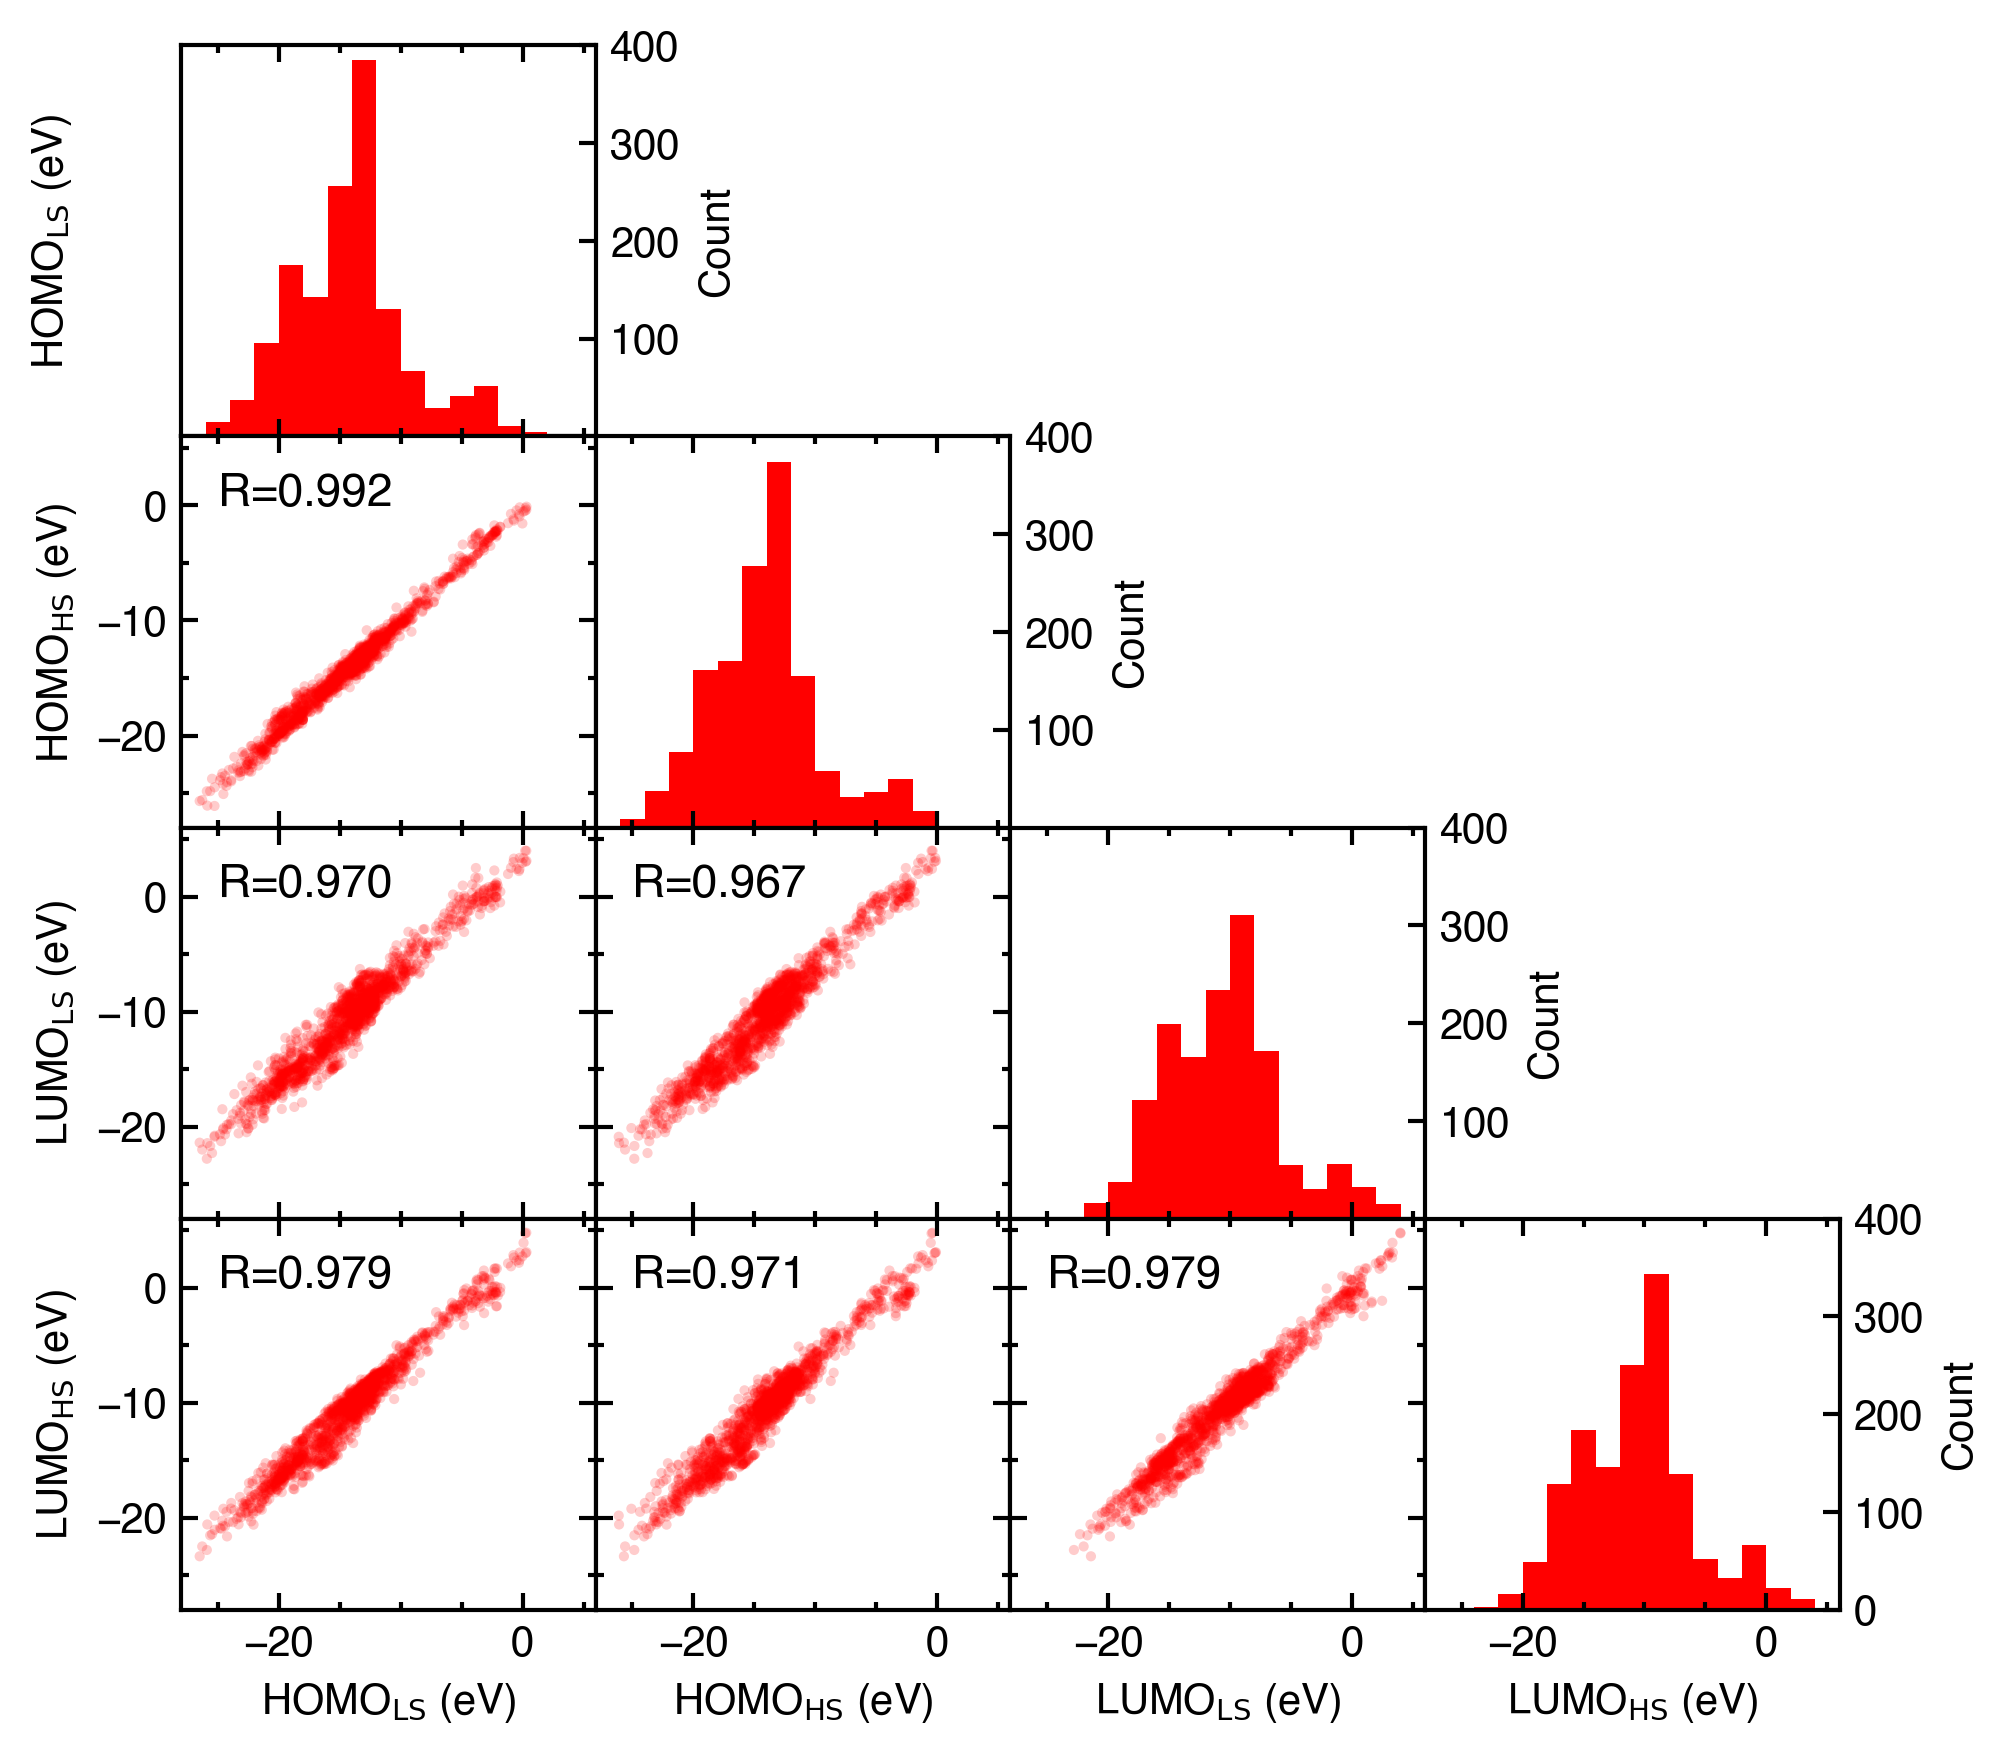

In [6]:
upper_lim = 6
lower_lim = -28
bins = np.linspace(-28, 6, 18)
labels = [
    "HOMO$_\mathrm{LS}$ (eV)",
    "HOMO$_\mathrm{HS}$ (eV)",
    "LUMO$_\mathrm{LS}$ (eV)",
    "LUMO$_\mathrm{HS}$ (eV)",
]

gridspec_kw = {
    "left": 0.09,
    "right": 0.92,
    "top": 0.96,
    "bottom": 0.09,
    "hspace": 0.0,
    "wspace": 0.0,
}
fig, axes = plt.subplots(
    figsize=(6.66, 0.9 * 6.66),
    ncols=4,
    nrows=4,
    sharex=True,
    sharey=False,
    gridspec_kw=gridspec_kw,
)

# Turn off upper triangle
for i in range(0, 4):
    for j in range(i + 1, 4):
        axes[i, j].set_visible(False)

for i in range(1, 4):
    for j in range(0, i):
        ax = axes[i, j]
        ax.tick_params(labelsize=10)
        ax.scatter(
            frontier_orbital_energies.values[:, j],
            frontier_orbital_energies.values[:, i],
            alpha=0.2,
            s=6,
        )
        ax.text(-25, 0, f"R={corrcoef[i, j]:.3f}", fontsize=11)
        ax.set_xlim(lower_lim, upper_lim)
        ax.set_ylim(lower_lim, upper_lim)
        ax.set_xticks([-25, -15, -10, -5, 5], minor=True)
        ax.set_yticks([-25, -15, -10, -5, 5], minor=True)
        if j == 0:
            ax.set_ylabel(labels[i])
        else:
            ax.set_yticklabels([])
        if i == 3:
            ax.set_xlabel(labels[j])
# Add the text for the first row
axes[0, 0].text(-38.6, 200, labels[0], rotation=90, va="center", ha="center")


# Diagonal
for i in range(4):
    ax = axes[i, i]
    ax.tick_params(labelsize=10)
    ax.hist(frontier_orbital_energies.values[:, i], bins=bins)
    ax.set_ylim(0, 400)
    ax.set_ylabel("Count")
    ax.yaxis.set_label_position("right")
    ax.yaxis.tick_right()
    if i == 3:
        ax.set_yticks([0, 100, 200, 300, 400])
        ax.set_xlabel(labels[i])
    else:
        ax.set_yticks([100, 200, 300, 400])
fig.savefig("plots/scatter_matrix_frontier_orbital_energies.pdf")